In [10]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2
from importlib import reload

In [8]:
###########################
# AE 모델링
###########################

from keras import layers, models  # (Input, Dense), (Model)


class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        # Encoder, Decoder ??

        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)


###########################
# 데이터 준비
###########################
from ann_mnist_cl import Data_func


###########################
# 학습 효과 분석
###########################
from ann_mnist_cl import plot_loss, plot_acc
import matplotlib.pyplot as plt


###########################
# AE 동작 확인
###########################
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


###########################
# 학습
###########################
def main(epochs=20):
    x_nodes = 784
    z_dim = 36

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    autoencoder = AE(x_nodes, z_dim)

    history = autoencoder.fit(x_train, x_train,
                              epochs=epochs,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(x_test, x_test))

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

    show_ae(autoencoder)
    plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 53s - loss: 0.3675 - acc: 0.7502 - val_loss: 0.2726 - val_acc: 0.7943
Epoch 2/2
60000/60000 [==============================] - 1s - loss: 0.2656 - acc: 0.7975 - val_loss: 0.2551 - val_acc: 0.7957


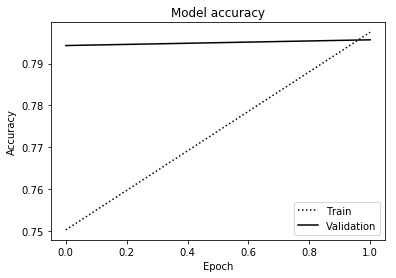

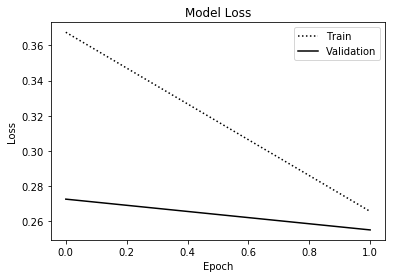

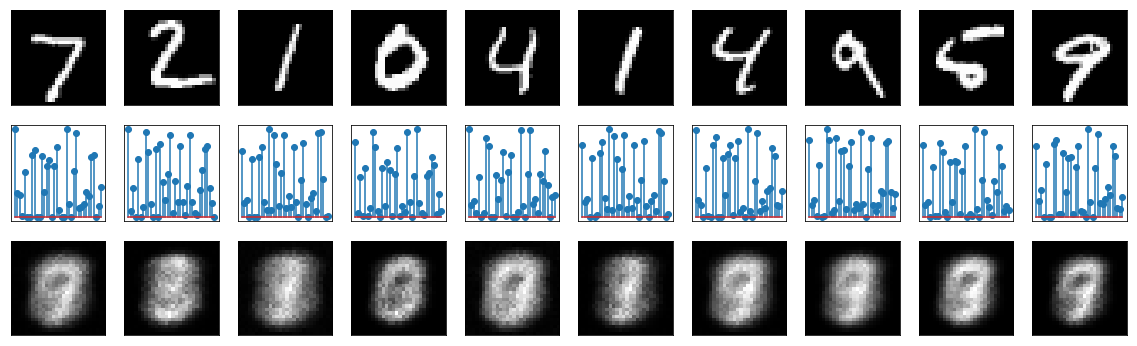

In [9]:
main(2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.3697 - acc: 0.7487 - val_loss: 0.2722 - val_acc: 0.7952
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.2644 - acc: 0.7981 - val_loss: 0.2534 - val_acc: 0.7983
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.2426 - acc: 0.7981 - val_loss: 0.2298 - val_acc: 0.7963
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.2213 - acc: 0.7981 - val_loss: 0.2110 - val_acc: 0.7981
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.2054 - acc: 0.7992 - val_loss: 0.1976 - val_acc: 0.7998
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.1939 - acc: 0.8004 - val_loss: 0.1878 - val_acc: 0.8006
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.1852 - acc: 0.8015 - val_loss: 0.1800 - val_acc: 0.8012
Epoch 8/20
60000/60000 [==============================] - 1s 

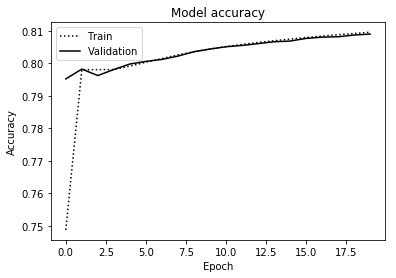

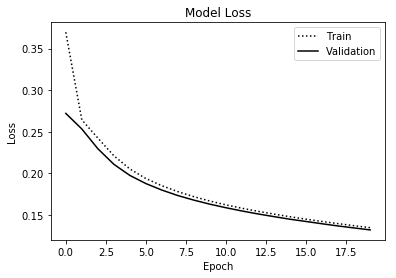

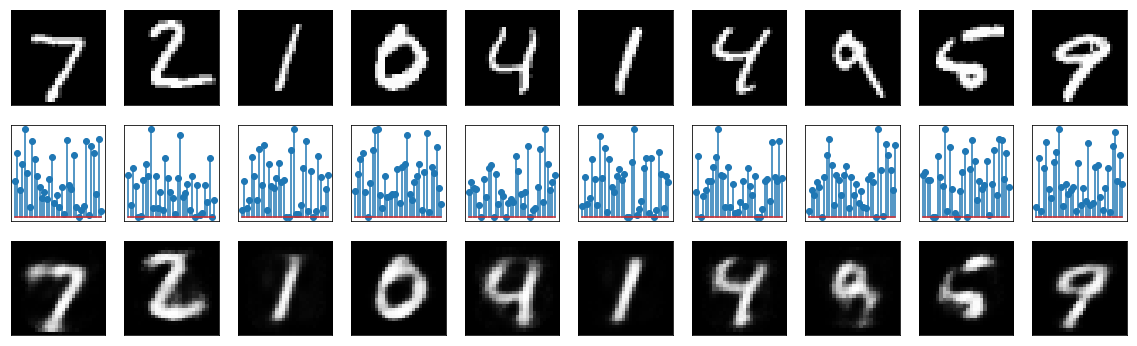

In [11]:
epochs = 20

x_nodes = 784
z_dim = 36

(X_train, Y_train), (X_test, Y_test) = Data_func()
autoencoder = AE(x_nodes, z_dim)

history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()

show_ae(autoencoder)
plt.show()